<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DSPT3_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10], 'c': [1,5,2,7,3]})
df.head()

,a,b,c
0,1,2,1
1,2,4,5
2,3,6,2
3,4,8,7
4,5,10,3


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?
df.describe()

,a,b,c
count,5.000000,5.000000,5.000000
mean,3.000000,6.000000,3.600000
std,1.581139,3.162278,2.408319
min,1.000000,2.000000,1.000000
25%,2.000000,4.000000,2.000000
50%,3.000000,6.000000,3.000000
75%,4.000000,8.000000,5.000000
max,5.000000,10.000000,7.000000


In [0]:
# get mean from each column
df.mean()

a    3.0
b    6.0
c    3.6
dtype: float64

In [0]:
# get mean from column a
df['a'].mean()

3.0

In [0]:
# Get mean from column b
df['b'].mean()

6.0

In [0]:
# get mean from column c
df['c'].mean()

3.6

In [0]:
# Get mean from column a and b
df[['a', 'b']].mean()

a    3.0
b    6.0
dtype: float64

In [0]:
# Get mean from column a and c
df[['a', 'c']].mean()

a    3.0
c    3.6
dtype: float64

In [0]:
# Get min
df['a'].min()

1

In [0]:
# Get max
df['a'].max()

5

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the cooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
sample.shape

(1000,)

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

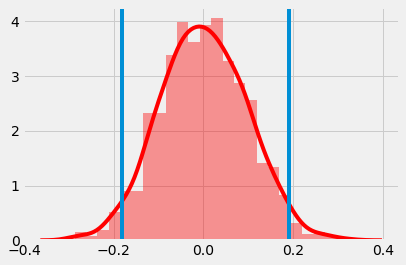

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0);

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

In [0]:
# https://en.wikipedia.org/wiki/Central_limit_theorem

In [0]:
# Do for just 1 person
person1_cals = np.random.normal(2500, 100, size=365);
#person1_cals

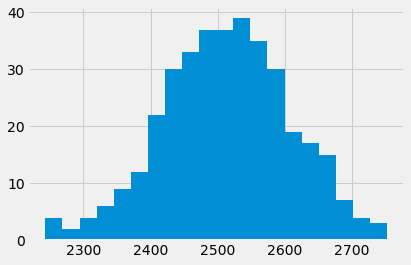

In [0]:
import matplotlib.pyplot as plt

plt.hist(person1_cals, bins=20);

In [0]:
person1_cals.mean()

2513.0386188608613

In [0]:
# Do for 200 people now
N = 200
people_cals = [np.random.normal(2500, 100, size=365) for _ in range(N)]

In [0]:
people_mean_cals = [person.mean() for person in people_cals]
people_mean_cals[:10]

[2511.6080614285775,
 2504.7113659713036,
 2502.698291964197,
 2507.3979392249157,
 2498.048344896023,
 2505.3887533937277,
 2501.973470045683,
 2492.583756954031,
 2494.800374648437,
 2503.138141500591]

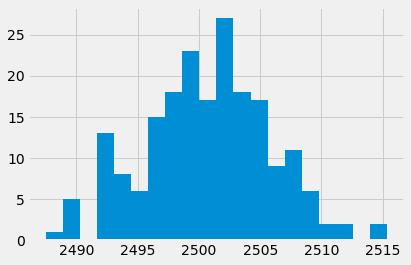

In [0]:
plt.hist(people_mean_cals, bins=20);

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)   # df=10 is 10 degrees of freedom
t_df100 = np.random.standard_t(df=100, size=100) # df=100 is 100 degrees of freedom
t_df1000 = np.random.standard_t(df=1000, size=1000) # df=1000 is 1000 degrees of freedom

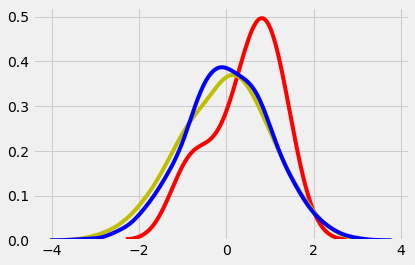

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
print('text1' + ' ' + 'text2')

text1 text2


In [0]:
a = 3.03242

In [0]:
print('my number is %s' % a)
print('my number is {:.2f}'.format(a))
print(f'my number is {a:.1f}')

my number is 3.03242
my number is 3.03
my number is 3.0


In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: 0.4314415263773813
Standard Deviation: 0.7266312407376241
Variance: 0.527992960015899
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.03667374736661771
Standard Deviation: 0.9977880471430802
Variance: 0.9955809870216017
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.036361250874330994
Standard Deviation: 0.9863744933183521
Variance: 0.9729346410690359


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
# "Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds"

In [0]:
mu1 = 180
sigma1 = 5
n1 = 1000
sample1 = np.random.normal(size=n1, scale=sigma1, loc=mu1)
sample1[:10]

array([191.76912488, 174.07424703, 189.93061362, 174.40475559,
       175.73943351, 176.18463193, 180.67575634, 176.93342245,
       177.97482359, 171.74682987])

In [0]:
mu2 = 178.5
sigma2 = 4.25
n2 = 800
sample2 = np.random.normal(scale=sigma2, loc=mu2, size=n2)
sample2[:10]

array([185.85493186, 175.46594739, 188.65126752, 172.2664266 ,
       181.42466884, 176.70399376, 188.87688731, 173.13086011,
       174.98968138, 179.49389614])

In [0]:
import seaborn as sns

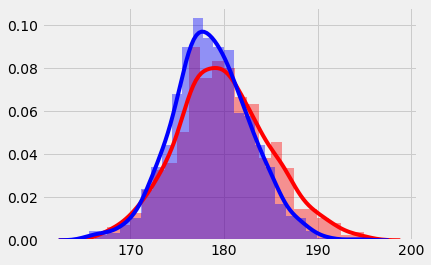

In [0]:
sns.distplot(sample1, color='r')
sns.distplot(sample2, color='b');

# The four parts of T-tests

- Null Hypothesis (aka status quo, boring hypothesis): $\mu1 == \mu2$
- Alternative Hypothesis: e.g. $\mu1 =/= \mu2$
- t-statistic
- p-value

In [0]:
ttest_ind(sample1, sample2)

Ttest_indResult(statistic=5.474022347440532, pvalue=5.018267540738021e-08)

In [0]:
pvalue_list = []

for _ in range(100):
  mu1 = 180
  sigma = 5
  n1 = 100
  sample1 = np.random.normal(mu1, sigma1, size=n1)
  
  mu2 = 178.5
  sigma2 = 4.25
  n2 = 80
  sample2 = np.random.normal(mu2, sigma2, size=n2)
  _, pvalue = ttest_ind(sample1, sample2)
  pvalue_list.append(pvalue)

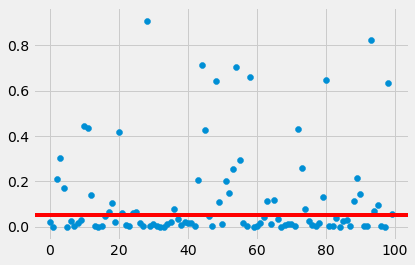

In [0]:
plt.scatter(list(range(100)), pvalue_list)
plt.axhline(y=0.05, color='r')

In [0]:
pvalue_arr = np.array(pvalue_list)
np.sum(pvalue_arr > 0.05)

46

# Type 1 vs Type 2 error
https://en.wikipedia.org/wiki/Type_I_and_type_II_errors

# Test statistic
https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-is-a-t-test-and-why-is-it-like-telling-a-kid-to-clean-up-that-mess-in-the-kitchen

https://blog.minitab.com/blog/statistics-and-quality-data-analysis/what-are-t-values-and-p-values-in-statistics

# P-value

https://stats.stackexchange.com/questions/166323/misunderstanding-a-p-value

# One-tailed vs two-tailed
https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/

https://www.youtube.com/watch?v=VP1bhopNP74

# One sample vs two sample

https://web.ma.utexas.edu/users/mks/statmistakes/2samplevs1sampletest.html

https://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-1-sample-2-sample-and-paired-t-tests


# Example dataset
https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016

In [0]:
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
df.shape

(27820, 12)

In [0]:
df['year'].max()

2016

In [0]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [0]:
df_2016 = df[df['year'] == 2016]
df_2016.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
1248,Armenia,2016,male,75+ years,12,61956,19.37,Armenia2016,NaN,"10,546,135,160",3788,Silent
1249,Armenia,2016,male,55-74 years,16,237813,6.73,Armenia2016,NaN,"10,546,135,160",3788,Boomers
1250,Armenia,2016,male,35-54 years,16,350633,4.56,Armenia2016,NaN,"10,546,135,160",3788,Generation X
1251,Armenia,2016,male,15-24 years,5,202220,2.47,Armenia2016,NaN,"10,546,135,160",3788,Millenials
1252,Armenia,2016,female,75+ years,2,102414,1.95,Armenia2016,NaN,"10,546,135,160",3788,Silent


In [0]:
df_2016.shape

(160, 12)

In [0]:
df_2016['country'].unique()

array(['Armenia', 'Austria', 'Croatia', 'Cyprus', 'Czech Republic',
       'Grenada', 'Hungary', 'Iceland', 'Lithuania', 'Mauritius',
       'Mongolia', 'Netherlands', 'Qatar', 'Romania', 'Sweden',
       'Thailand'], dtype=object)

In [0]:
df_male = df_2016[df_2016['sex'] == 'male']
df_female = df_2016[df_2016['sex'] == 'female']

In [0]:
df_male.shape

(80, 12)

In [0]:
df_female.shape

(80, 12)

In [0]:
# Group by two features, country and age and get mean and get the column suicides
df_female_group = df_female.groupby(['country', 'age'], as_index=False).mean().groupby('country')['suicides/100k pop'].mean()
df_female_group

In [0]:
df_female[df_female['country'] == 'Armenia']['suicides/100k pop'].mean()

1.174

In [0]:
df_male_group = df_male.groupby(['country', 'age'], as_index=False).mean().groupby('country')['suicides/100k pop'].mean()
df_male_group

country
Armenia            6.938
Austria           29.126
Croatia           34.338
Cyprus             8.418
Czech Republic    27.008
Grenada            0.000
Hungary           38.062
Iceland           24.678
Lithuania         63.428
Mauritius         17.300
Mongolia          31.242
Netherlands       17.412
Qatar              2.710
Romania           19.760
Sweden            19.564
Thailand          12.396
Name: suicides/100k pop, dtype: float64

In [0]:
df_male[df_male['country'] == 'Armenia']['suicides/100k pop'].mean()

6.938000000000001

In [0]:
ttest_ind(df_female_group, df_male_group)

Ttest_indResult(statistic=-4.2791492382884435, pvalue=0.00017639850827717496)

In [0]:
ttest_ind(df_female_group, df_male_group, equal_var=False)

Ttest_indResult(statistic=-4.2791492382884435, pvalue=0.0005475986477063533)

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means